# H.KianAra

# گسسته سازی داده ها

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DataSets/bank-full.csv', delimiter=';')

df.y = df.y.replace({'yes':1, 'no': 0})

conditions = [df['age'] <20, 
              (df['age']>=20) & (df['age']<30), 
              (df['age']>=30) & (df['age']<40),
              (df['age']>=40) & (df['age']<50),
              (df['age']>=50) & (df['age']<60),
              (df['age']>=60) & (df['age']<70),
              (df['age']>=70) & (df['age']<80),
              df['age']>=80]

agebins = [1, 2, 3, 4, 5, 6, 7, 8]
df['age'] = np.select(conditions, agebins)

jobary = df['job'].unique()
num = 1
for i in jobary:
  df.job = df.job.replace({i : num})
  num += 1

df.marital = df.marital.replace({'married' : 1, 'single' : 0, 'divorced' : 2})

eduary = df['education'].unique()
num = 1
for i in eduary:
  df.education = df.education.replace({i : num})
  num += 1

df.default = df.default.replace({'yes':1, 'no': 0})
df.housing = df.housing.replace({'yes':1, 'no': 0})
df.loan = df.loan.replace({'yes':1, 'no': 0})
df.contact = df.contact.replace({'cellular': 2, 'unknown': 1, 'telephone': 0})

month_conditions = [df['month'] == 'jan', df['month'] == 'feb',
                    df['month'] == 'mar', df['month'] == 'apr',
                    df['month'] == 'may', df['month'] == 'jun',
                    df['month'] == 'jul', df['month'] == 'aug',
                    df['month'] == 'sep', df['month'] == 'oct',
                    df['month'] == 'nov', df['month'] == 'dec']

month_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df['month'] = np.select(month_conditions, month_bins)

poutcome = df['poutcome'].unique()
num = 1
for i in poutcome:
  df.poutcome = df.poutcome.replace({i : num})
  num += 1

print('\n\nData Shapes : ', df.shape)
df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Shapes :  (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,5,1,1,1,0,2143,1,0,1,5,5,261,1,-1,0,1,0
1,4,2,0,2,0,29,1,0,1,5,5,151,1,-1,0,1,0
2,3,3,1,2,0,2,1,1,1,5,5,76,1,-1,0,1,0


# بررسی تقارن کلاس داده ها

0    39922
1     5289
Name: y, dtype: int64 



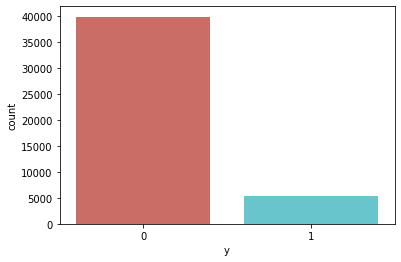

In [ ]:
print(df['y'].value_counts(), '\n')
sns.countplot(x = 'y', data=df, palette='hls')
# بسیار نامتقارن

# نرمال سازی و متقارن سازی


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


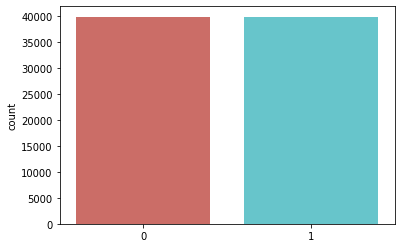

In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import imblearn

x = df.loc[:, df.columns != 'y']
y = df.iloc[:, -1]

overSampling = SMOTE()
over_x, over_y = overSampling.fit_resample(x, y)

X_scaled = preprocessing.StandardScaler().fit_transform(over_x)

sns.countplot(x = over_y, data=df, palette='hls')

# SVM & PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC


print('SVM -without- PCA')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, over_y, test_size=0.3, random_state=1)
svm_model = SVC().fit(X_train, y_train)
y_hat = svm_model.predict(X_test)
print('\nSVM Accuracy : %.3f' % svm_model.score(X_test, y_test))
print('SVM Confusion Matrix :\n', confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

print('*' * 80)

print('SVM -with- PCA')
pca = PCA(n_components = 7) # future exteraction with PCA 17 to 7
pca_df = pca.fit_transform(X_scaled)
var_pca = pca.explained_variance_ratio_
sum_var = 0
for i in var_pca:
  sum_var += i
print('\nSave Var info : %.3f' % sum_var)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, over_y, test_size=0.3, random_state=1)

svm_model_pca = SVC().fit(X_train_pca, y_train_pca)

y_hat_pca = svm_model_pca.predict(X_test_pca)

print('\nSVM Accuracy : %.3f' % svm_model_pca.score(X_test_pca, y_test_pca))
print('SVM Confusion Matrix :\n', confusion_matrix(y_test_pca, y_hat_pca))
print(classification_report(y_test_pca, y_hat_pca))

SVM -without- PCA

SVM Accuracy : 0.886
SVM Confusion Matrix :
 [[10334  1691]
 [ 1032 10897]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     12025
           1       0.87      0.91      0.89     11929

    accuracy                           0.89     23954
   macro avg       0.89      0.89      0.89     23954
weighted avg       0.89      0.89      0.89     23954

********************************************************************************
SVM -with- PCA

Save Var info : 0.607

SVM Accuracy : 0.851
SVM Confusion Matrix :
 [[ 9982  2043]
 [ 1535 10394]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     12025
           1       0.84      0.87      0.85     11929

    accuracy                           0.85     23954
   macro avg       0.85      0.85      0.85     23954
weighted avg       0.85      0.85      0.85     23954



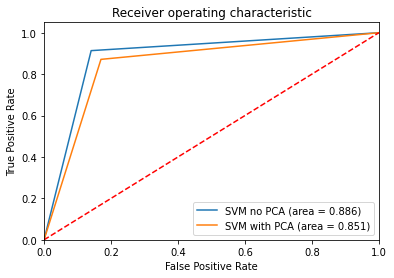

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

RocCurve = roc_auc_score(y_test, y_hat)
fpr, tpr, thresholds = roc_curve(y_test, y_hat)

RocCurvepca = roc_auc_score(y_test, y_hat_pca)
fprpca, tprpca, thresholdspca = roc_curve(y_test, y_hat_pca)

plt.figure()
plt.plot(fpr, tpr, label='SVM no PCA (area = %0.3f)' % RocCurve)
plt.plot(fprpca, tprpca, label='SVM with PCA (area = %0.3f)' % RocCurvepca)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# K-means

In [ ]:
!git clone https://github.com/tirthajyoti/Machine-Learning-with-Python

fatal: destination path 'Machine-Learning-with-Python' already exists and is not an empty directory.


In [ ]:
import pandas as pd

data=pd.read_csv('Machine-Learning-with-Python/Datasets/Mall_Customers.csv')
print('data shape : ', data.shape)
data.head(4)

data shape :  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [ ]:
data = data.rename({'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'}, axis=1)
data.Gender = data.Gender.replace({'Male':1, 'Female': 0})
del data['CustomerID']
data.head(4)

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77


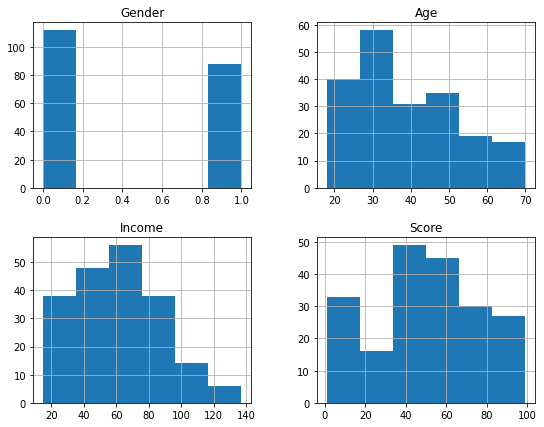

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=6, figsize = (9,7))
plt.show()

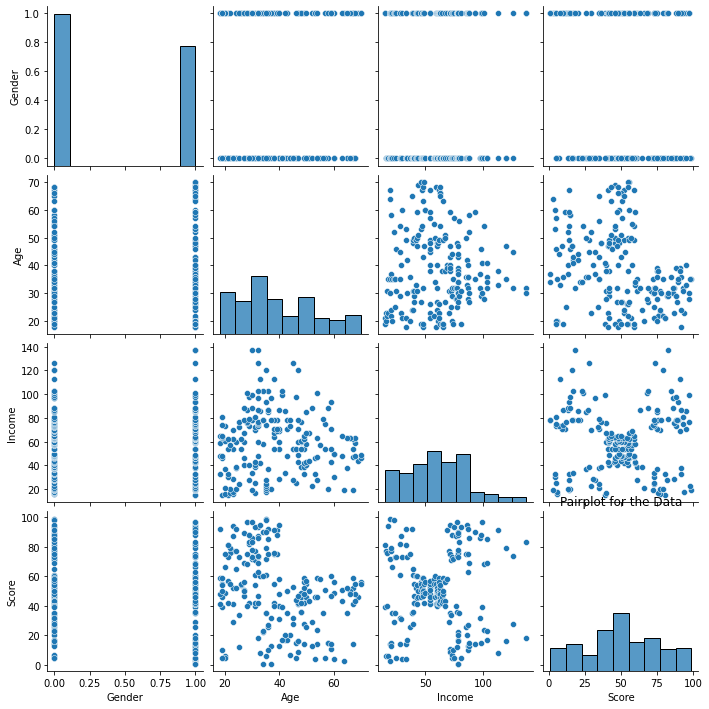

In [ ]:
sns.pairplot(data)
plt.title('Pairplot for the Data')
plt.show()

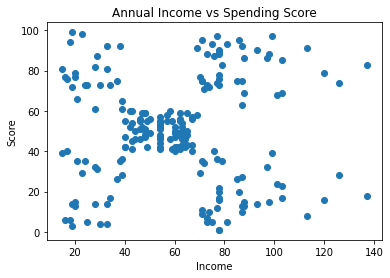

In [ ]:
plt.scatter(data.Income, data.Score)
plt.xlabel('Income'), 
plt.ylabel('Score') 
plt.title('Annual Income vs Spending Score')
plt.show()

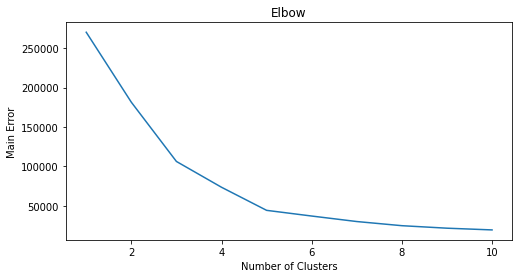

In [ ]:
from sklearn.cluster import KMeans

X = data.iloc[:, [2,3]].values

k=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    k.append(kmeans.inertia_)

plt.figure(1 , figsize = (8 , 4))
plt.plot(range(1,11), k)
plt.title('Elbow')
plt.xlabel('Number of Clusters')
plt.ylabel('Main Error')
plt.show()

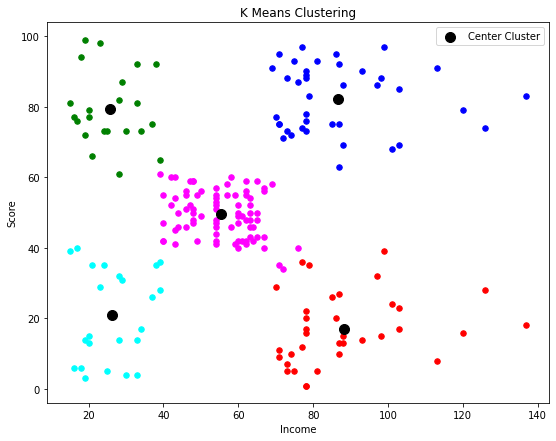

In [ ]:
model = KMeans(n_clusters= 5, init='k-means++')
x_pred = model.fit_predict(X)

plt.figure(1 , figsize = (9 , 7))
plt.scatter(X[x_pred == 0, 0], X[x_pred == 0, 1], s = 30, c = 'magenta')
plt.scatter(X[x_pred == 1, 0], X[x_pred == 1, 1], s = 30, c = 'blue')
plt.scatter(X[x_pred == 2, 0], X[x_pred == 2, 1], s = 30, c = 'cyan')
plt.scatter(X[x_pred == 3, 0], X[x_pred == 3, 1], s = 30, c = 'green')
plt.scatter(X[x_pred == 4, 0], X[x_pred == 4, 1], s = 30, c = 'red')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'black', label='Center Cluster')
plt.title('K Means Clustering')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.show()

#  تشکر از زحمات طول ترم شما سرکار خانم غلامرضایی
# ترم بسیار مفیدی بود 
# همچنین تشکر ویژه ما را به استاد ابلاغ فرمایید